<a href="https://colab.research.google.com/github/Eshetadiba/ML_Projects/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan Approval ML model


In [1]:
#1. Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
#2. Import the dataset provided
df = pd.read_excel('/content/drive/MyDrive/loan-predictionUC.xlsx')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
#3. Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [94]:
df.shape

(614, 13)

In [95]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [96]:
#4. Deal with the missing values if any
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
#First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [8]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [98]:
#Let's confirm if there are any missing values in 'LoanAmount' & 'Credit_History'
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
#Now, Let's drop all the missing values remaining
df.dropna(inplace=True)

In [101]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [102]:
#Now, Let's check the final Dataset Shape
df.shape

(499, 13)

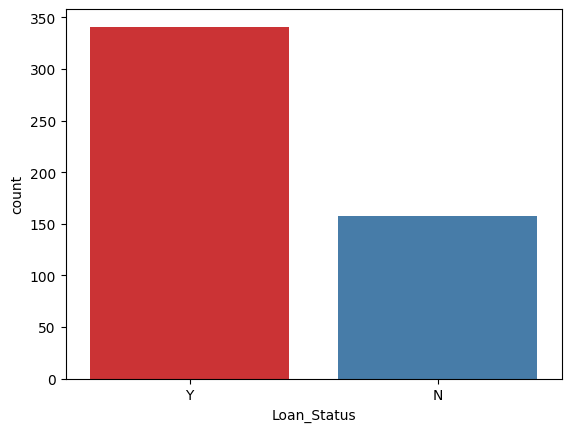

In [103]:
#5. Do some visualization if necessary
sns.countplot(x='Loan_Status', data=df)
plt.show()

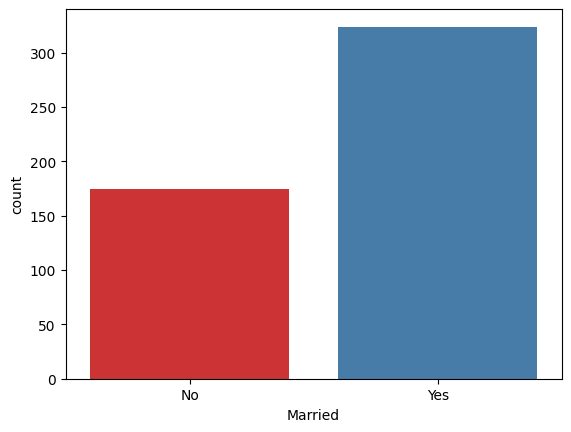

Loan_Status   N    Y
Married             
No           67  108
Yes          91  233


In [104]:
#$Comparison between Married Status in getting the Loan:
sns.set_palette('Set1')
sns.countplot(data=df, x='Married', palette='Set1')
plt.show()

print(pd.crosstab(df['Married'], df['Loan_Status']))

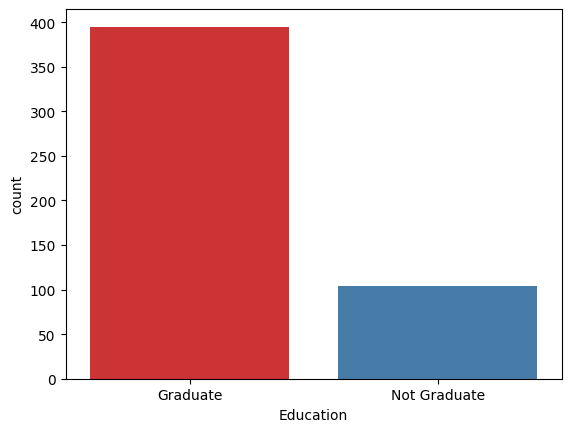

Loan_Status     N    Y
Education             
Graduate      117  278
Not Graduate   41   63


In [105]:
#Comparison between Education Status of an Individual in getting the Loan:
sns.set_palette('Set1')
sns.countplot(data=df, x='Education', palette='Set1')
plt.show()

print(pd.crosstab(df['Education'], df['Loan_Status']))

In [106]:
#Let's replace the Variable values to Numerical form & display the Value Counts
#The data in Numerical form avoids disturbances in building the model.

df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].value_counts()




1    341
0    158
Name: Loan_Status, dtype: int64

In [107]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()



1    411
0     88
Name: Gender, dtype: int64

In [108]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()


1    324
0    175
Name: Married, dtype: int64

In [109]:

df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3,})
df['Dependents'].value_counts()



3.0    43
Name: Dependents, dtype: int64

In [110]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()


1    395
0    104
Name: Education, dtype: int64

In [111]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()


0    430
1     69
Name: Self_Employed, dtype: int64

In [112]:

df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()


1.0    185
2.0    159
0.0    145
Name: Property_Area, dtype: int64

In [113]:

df['LoanAmount'].value_counts()



146.412162    19
120.000000    13
100.000000    13
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 187, dtype: int64

In [114]:
df['Loan_Amount_Term'].value_counts()




360.0    428
180.0     38
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [88]:
df['Credit_History'].value_counts()


1.0    468
0.0     74
Name: Credit_History, dtype: int64

<ipython-input-115-1c8bf2dc93d6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

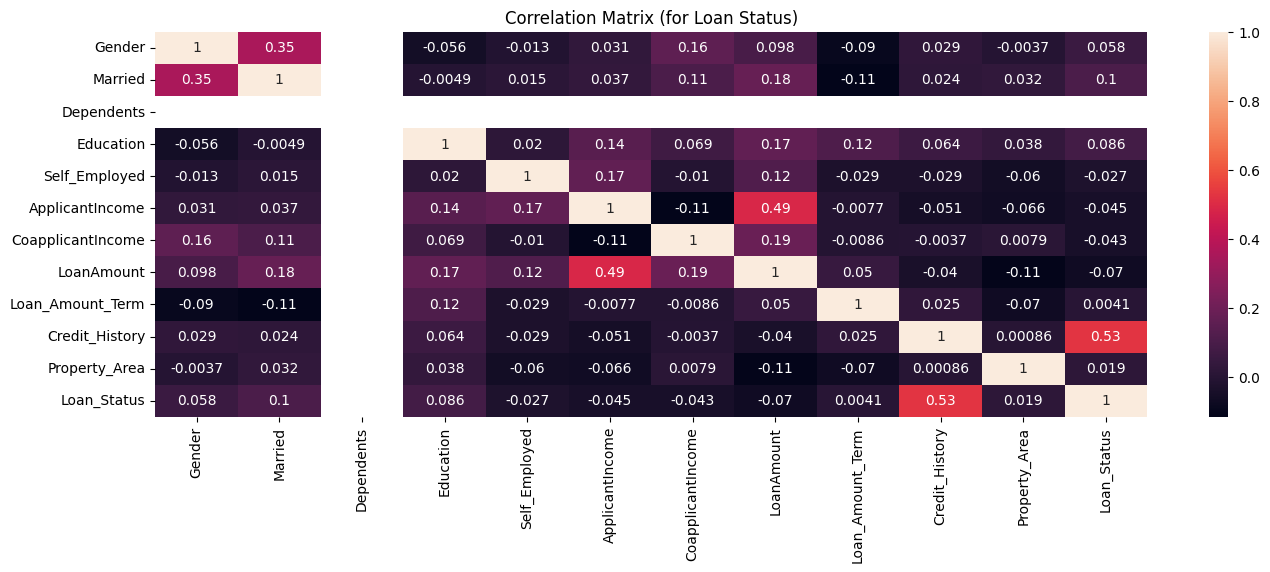

In [115]:
#Display the Correlation Matrix
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [117]:
#Final DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,NaN,1,0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,LP001003,1,1,NaN,1,0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,LP001005,1,1,NaN,1,1,3000,0.0,66.000000,360.0,1.0,2.0,1
3,LP001006,1,1,NaN,0,0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,LP001008,1,0,NaN,1,0,6000,0.0,141.000000,360.0,1.0,2.0,1


In [133]:
#  'df' is my DataFrame
numeric_feature_names = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_feature_names = ['Gender', 'Married', 'Dependents', 'Education' , 'Property_Area']

numeric_feature_indices = [df.columns.get_loc(col) for col in numeric_feature_names]
categorical_feature_indices = [df.columns.get_loc(col) for col in categorical_feature_names]

print("Numeric Feature Indices:", numeric_feature_indices)
print("Categorical Feature Indices:", categorical_feature_indices)


Numeric Feature Indices: [6, 7, 8, 9]
Categorical Feature Indices: [1, 2, 3, 4, 11]


In [118]:
#Importing Packages for Classification algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder




In [119]:
#6. Divide the dataset into training and test datasets
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [121]:
print(X_train)

[[  1.   1.  nan ... 360.   1.   0.]
 [  1.   1.   3. ... 360.   1.   1.]
 [  1.   1.  nan ... 360.   1.   0.]
 ...
 [  0.   1.  nan ... 360.   1.   2.]
 [  1.   1.  nan ... 360.   1.   2.]
 [  1.   1.   3. ... 360.   0.   1.]]


In [122]:
print(X_test)

[[  1.   0.  nan ... 360.   1.   2.]
 [  0.   0.  nan ... 360.   1.  nan]
 [  1.   1.   3. ... 360.   1.   0.]
 ...
 [  0.   0.  nan ... 360.   1.   0.]
 [  1.   1.  nan ... 360.   1.   2.]
 [  1.   1.  nan ... 360.   1.   2.]]


In [123]:
print(y_train)

[1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0
 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]


In [135]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numeric features and categorical features column indices
numeric_features_idx = [6, 7, 8, 9]
categorical_features_idx = [1, 2, 3, 4, 10]

# Create pipelines for numeric and categorical preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer to combine both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_idx),
        ('cat', categorical_transformer, categorical_features_idx)
    ])

# Example usage:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [136]:
# 7 Building the machine learning model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])




In [137]:
# 8 Training the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2, 3, 4, 10])])),
                ('classifier', LogisticRegression())])

In [138]:
#9. Test the model and find the accuracy of the model on the test and the training datasets
y_train_pred = model.predict(X_train)


In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_accuracy = accuracy_score(y_train, y_train_pred)

In [140]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [141]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.80
Test Accuracy: 0.82


In [142]:
# Step 10: Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 21  24]
 [  3 102]]



# Loan Approval Prediction Project: Conclusions

In this project, we aimed to predict whether a loan application would be approved or not based on various attributes provided by the applicants. The dataset contained information about the applicants' gender, marital status, education, income, loan amount, credit history, property area, and more.

## Data Understanding and Preprocessing

We started by loading the dataset and understanding its structure. We identified missing values and dealt with them using forward-fill and other appropriate strategies. Categorical columns were encoded using one-hot encoding to make them suitable for model training.

## Exploratory Data Analysis

We performed exploratory data analysis to gain insights into the distribution of various features and their relationship with the target variable. Visualizations helped us understand trends and patterns in the data.

## Model Building and Evaluation

We divided the dataset into training and test sets, and then built a Logistic Regression Classifier to predict loan approval. We achieved a training accuracy of 80% and a test accuracy of 82%. These accuracies suggest that our model can predict loan approval with reasonable accuracy.

## Confusion Matrix

A confusion matrix was created to analyze the model's performance in more detail. We observed that our model had 3 false positives and 4 false negatives, indicating that there might be room for further improvements.

## Conclusions

Based on our analysis and model results, we can draw the following conclusions:

- Features such as credit history, applicant income, and loan amount seem to have a significant impact on loan approval.
- The model's training and test accuracies suggest that it's performing reasonably well. However, fine-tuning hyperparameters or trying other algorithms could potentially improve its performance.
- The confusion matrix shows us where the model is making mistakes. Further investigation into false positives and false negatives could help in refining the model and feature selection.

Overall, this project provides valuable insights into loan approval prediction using machine learning techniques. Future work could involve more advanced model tuning and feature engineering to enhance the model's performance.


